# Libraries

In [33]:
# Support
import os
import git

# Data manipulation
import pandas as pd
import numpy as np

# Machine Learning


# Functions

In [34]:
def get_git_root(path) -> str:
    git_repo = git.Repo(path, search_parent_directories=True)
    git_root = git_repo.git.rev_parse("--show-toplevel")
    return git_root

# Load Data

In [35]:
git_dir = get_git_root(os.getcwd())  # Github folder where dataset is storaged.
data_dir = os.path.join(git_dir, "data")  # Data folder

# Import dataset to a DataFrame
df_train = pd.read_csv(os.path.join(data_dir, "train.csv"))
df_test = pd.read_csv(os.path.join(data_dir, "test.csv"))
df_sample_submission = pd.read_csv(os.path.join(data_dir, "sample_submission.csv"))

In [36]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [38]:
df_sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# PREPROCESSING

In [39]:
# Calcular a porcentagem de valores ausentes em cada coluna com valores ausentes maiores que 0
missing_data = df_train.isnull().sum()[df_train.isnull().sum() > 0]
missing_data_percentage = missing_data / len(df_train) * 100

# Combinar as informações em um dataframe
df_train_missing_values = pd.concat(
    [missing_data, missing_data_percentage], axis=1, keys=["Total", "Percentage"]
)

# Ordenar os valores pela porcentagem de valores ausentes em ordem decrescente
df_train_missing_values = df_train_missing_values.sort_values(
    by="Percentage", ascending=False
)

df_train_missing_values

,Total,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [40]:
# Calcular a porcentagem de valores ausentes em cada coluna com valores ausentes maiores que 0
missing_data = df_test.isnull().sum()[df_test.isnull().sum() > 0]
missing_data_percentage = missing_data / len(df_test) * 100

# Combinar as informações em um dataframe
df_train_missing_values = pd.concat(
    [missing_data, missing_data_percentage], axis=1, keys=["Total", "Percentage"]
)

# Ordenar os valores pela porcentagem de valores ausentes em ordem decrescente
df_train_missing_values = df_train_missing_values.sort_values(
    by="Percentage", ascending=False
)

df_train_missing_values

,Total,Percentage
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
MasVnrType,894,61.274846
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageYrBlt,78,5.346127
GarageQual,78,5.346127


In [41]:
# Fixing Missing Data

initialTest = df_test.copy()
initialTrain = df_train.copy()

# Drops columns with >= 50% missing data
colsToDrop = ["PoolQC", "FireplaceQu", "Fence", "MiscFeature", "Alley"]
test = initialTest.drop(columns=colsToDrop)
train = initialTrain.drop(columns=colsToDrop)

categorical_cols = [
    "MSZoning",
    "Utilities",
    "Exterior1st",
    "Exterior2nd",
    "MasVnrType",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "KitchenQual",
    "Functional",
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "SaleType",
    "Electrical",
]

numerical_cols = [
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "BsmtFullBath",
    "BsmtHalfBath",
    "GarageYrBlt",
    "GarageCars",
    "GarageArea",
]

# Replace missing values in categorical columns with the mode
for col in categorical_cols:
    mode = train[col].mode()[0]
    train[col].fillna(mode, inplace=True)
    test[col].fillna(mode, inplace=True)


# Replace missing values in numerical columns with the median or mean
for col in numerical_cols:
    median = train[col].median()
    train[col].fillna(median, inplace=True)
    test[col].fillna(median, inplace=True)

# LotFrontage
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [42]:
# Preprocessing data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Features
categorical_features = [
    "MSZoning",
    "Street",
    "LotShape",
    "LandContour",
    "Utilities",
    "LotConfig",
    "LandSlope",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "MasVnrType",
    "ExterQual",
    "ExterCond",
    "Foundation",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "Heating",
    "HeatingQC",
    "CentralAir",
    "Electrical",
    "KitchenQual",
    "Functional",
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "PavedDrive",
    "SaleType",
    "SaleCondition",
]
numeric_features = [
    col
    for col in train.columns
    if col not in categorical_features + ["SalePrice", "Id"]
]

# Split dataset
y = train["SalePrice"]

# Preprocessor function
preprocessor = ColumnTransformer(
    sparse_threshold=0.0,
    n_jobs=-1,
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(), categorical_features),
    ],
)  # drop='first' gives us much worse results

# Fits preprocessor
preprocessor.fit(train)

# gets cols and combines
onehot_columns = preprocessor.named_transformers_["cat"].get_feature_names_out(
    input_features=categorical_features
)
all_feature_names = numeric_features + list(onehot_columns)

# transforms datasets
train = pd.DataFrame(data=preprocessor.transform(train), columns=all_feature_names)
test = pd.DataFrame(data=preprocessor.transform(test), columns=all_feature_names)

In [43]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,0.212877,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,0.645747,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,0.299451,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.309859,0.068587,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.073375,0.761179,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.872563,0.645747,0.110763,-0.795151,0.381743,-0.340077,-1.156380,-0.570750,0.053428,0.604293,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,0.674605,0.375850,-0.071836,0.381743,-0.439440,-1.301740,0.027027,1.051363,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,0.472599,0.332053,-0.795151,-0.517200,0.852269,0.636400,-0.570750,0.761852,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.073375,0.588031,-0.054002,-0.071836,0.381743,0.885390,0.636400,-0.460051,0.347326,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.492282,-0.421999,-0.552407,1.374795,-0.517200,0.686666,0.345679,-0.570750,-0.396190,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
# Feature Selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2)

# Filter: Variance Threshold
vt = VarianceThreshold(threshold=0.1)
X_train_filter = pd.DataFrame(vt.fit_transform(X_train))
X_test_filter = pd.DataFrame(vt.transform(X_test))
test = pd.DataFrame(vt.transform(test))
print("Features dropped by Variance Threshold:")
print(X_train.columns[vt.get_support()])
print("\nshape after filter:", X_train_filter.shape)

Features dropped by Variance Threshold:
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1',
       'LotShape_Reg', 'LotConfig_Corner', 'LotConfig_Inside',
       'Neighborhood_NAmes', 'Condition1_Norm', 'BldgType_1Fam',
       'HouseStyle_1Story', 'HouseStyle_2Story', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard',
       'Exterior

In [46]:
# Fit
from sklearn.linear_model import LinearRegression

# Criar um modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train_filter, y_train)

LinearRegression()

In [47]:
# Predict
y_pred = model.predict(X_test_filter)

# Evaluation
from sklearn.metrics import r2_score, mean_squared_error

# R2 Score
print(f"R^2 Score:    {r2_score(y_test, y_pred):.3f}")

# Mean_Squared_Error <- Real Target
print(f"Mean^2 Error: {mean_squared_error(y_test, y_pred):.0f}")

R^2 Score:    0.865
Mean^2 Error: 907205553


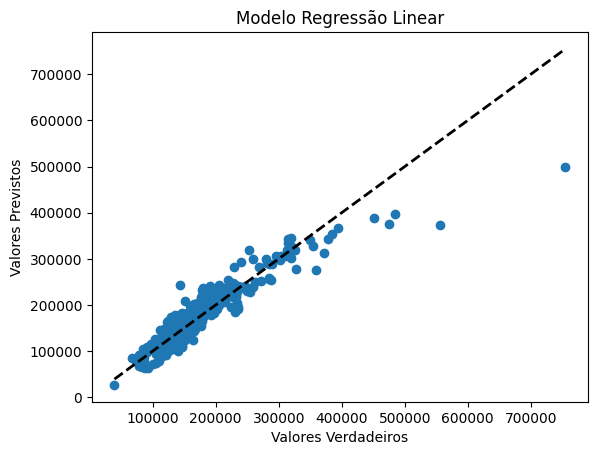

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# plotar valores verdadeiros vs valores previstos
plt.scatter(y_test, y_pred)

# traçar a linha de regressão linear
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "k--", lw=2)

# definir rótulos e título
plt.xlabel("Valores Verdadeiros")
plt.ylabel("Valores Previstos")
plt.title("Modelo Regressão Linear")

# mostrar o gráfico
plt.show()